In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Importing the dataset
loan_data = pd.read_csv("loan_train.csv")
loan_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Checking first few observations
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Drop unnecessary columns
loan_data.drop(["Loan_ID","Education","CoapplicantIncome","Loan_Amount_Term","Property_Area","Dependents"],axis="columns",inplace=True)


In [5]:
#Checking the data types in the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           601 non-null    object 
 1   Married          611 non-null    object 
 2   Self_Employed    582 non-null    object 
 3   ApplicantIncome  614 non-null    int64  
 4   LoanAmount       592 non-null    float64
 5   Credit_History   564 non-null    float64
 6   Loan_Status      614 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.7+ KB


In [6]:
#Checking for duplicates
loan_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [7]:
#Checking for missing values
loan_data.isna().any()

Gender              True
Married             True
Self_Employed       True
ApplicantIncome    False
LoanAmount          True
Credit_History      True
Loan_Status        False
dtype: bool

In [8]:
#Checking for the sum of NA's
loan_data.isnull().sum()


Gender             13
Married             3
Self_Employed      32
ApplicantIncome     0
LoanAmount         22
Credit_History     50
Loan_Status         0
dtype: int64

In [9]:
#Assigning binary codes to the categorical columns
loan_data['Gender']= loan_data['Gender'].map({'Male':0, 'Female':1})
loan_data['Married']= loan_data['Married'].map({'No':0, 'Yes':1})
loan_data['Self_Employed']= loan_data['Self_Employed'].map({'No':0, 'Yes':1})
loan_data['Loan_Status']= loan_data['Loan_Status'].map({'N':0, 'Y':1})

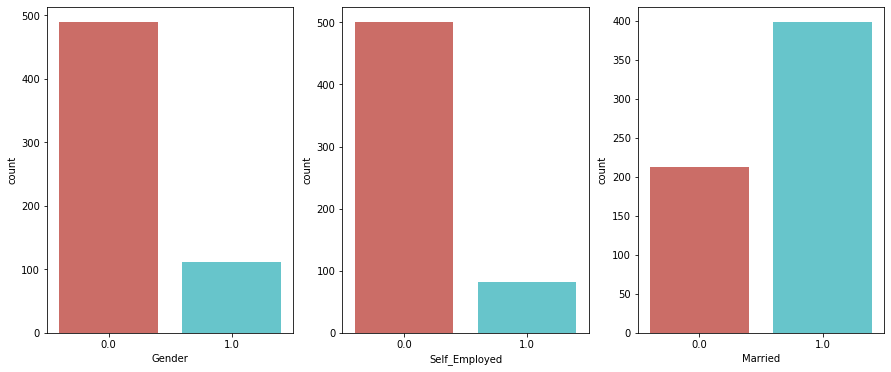

In [10]:
#Visualizing modes for the categorical columns
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot('Gender', data = loan_data, palette='hls')
plt.subplot(1,3,2)
sns.countplot('Self_Employed', data = loan_data, palette='hls')
plt.subplot(1,3,3)
sns.countplot('Married', data = loan_data, palette='hls')
plt.show()

In [11]:
loan_data['Married'].value_counts() 

1.0    398
0.0    213
Name: Married, dtype: int64

In [12]:
#Replacing the NA's in categorical columns with their modes
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [13]:
#Replacing the NA's in numerical columns with their medians
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data["Credit_History"].median()) 


In [14]:
loan_data.isna().any()

Gender             False
Married            False
Self_Employed      False
ApplicantIncome    False
LoanAmount         False
Credit_History     False
Loan_Status        False
dtype: bool

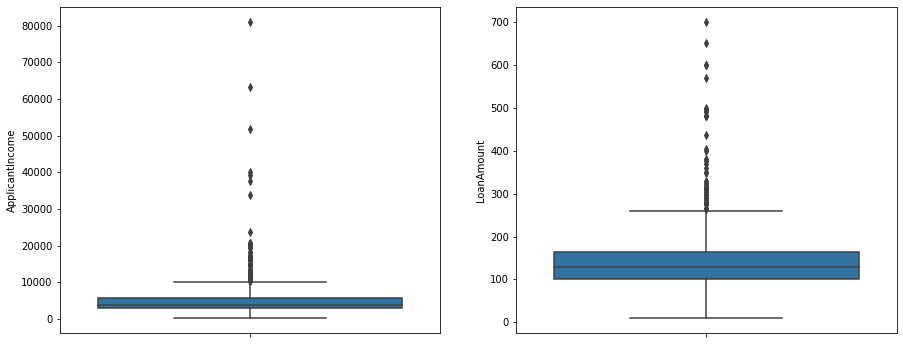

In [15]:
#Visualizing outliers
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(data=loan_data,y="ApplicantIncome")
plt.subplot(1,2,2)
sns.boxplot(data=loan_data,y="LoanAmount")
plt.show()

In [67]:
#create a function to find outliers using IQR
def find_outliers_IQR(loan_data):
    q1=loan_data.quantile(0.25)
    q3=loan_data.quantile(0.75)
    IQR=q3-q1
    outliers = loan_data[((loan_data<(q1-1.5*IQR)) | (loan_data>(q3+1.5*IQR)))]   
    return outliers

In [68]:
outliers = find_outliers_IQR(loan_data) 
outliers

,Gender,Married,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
609,1.0,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
outliers = find_outliers_IQR(loan_data["ApplicantIncome"])
print("number of outliers:" + str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers:0
max outlier value: nan
min outlier value: nan


Series([], Name: ApplicantIncome, dtype: float64)

In [70]:
def impute_outliers_IQR(loan_data):
    q1=loan_data.quantile(0.25)
    q3=loan_data.quantile(0.75)
    IQR=q3-q1
    upper = loan_data[~(loan_data>(q3+1.5*IQR))].max()
    lower = loan_data[~(loan_data<(q1-1.5*IQR))].min()
    loan_data= np.where(loan_data > upper,loan_data.median(),np.where(loan_data < lower,loan_data.median(),loan_data))                                                          
    return loan_data

In [71]:
#Passing the columns through the function above to transform the outliers into the meadian values of each column.
loan_data["ApplicantIncome"]=  impute_outliers_IQR(loan_data["ApplicantIncome"])
loan_data["LoanAmount"]=  impute_outliers_IQR(loan_data["LoanAmount"])

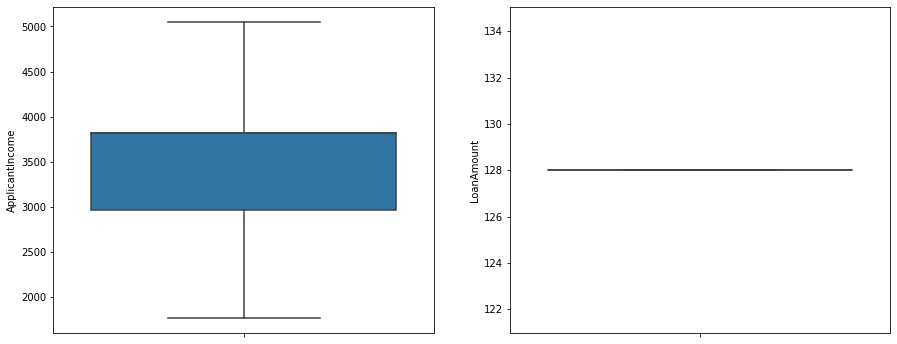

In [72]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(data=loan_data,y="ApplicantIncome")
plt.subplot(1,2,2)
sns.boxplot(data=loan_data,y="LoanAmount")
plt.show() 


In [76]:
#Independent and dependent Variables
X = loan_data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount','Credit_History','Self_Employed']]
y = loan_data.Loan_Status

In [77]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [78]:
# Create Random Forest classifier object
# Train  Random Forest  Classifier
model = RandomForestClassifier(max_depth=5,n_estimators=100, random_state = 10)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=10)

In [79]:
# Get the roc curve
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.title("Receiver Operating Characteristics")
    plt.plot(fpr,tpr,"b",label="AUC=%0.2f" % roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0,1],[0,1],"r--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [82]:
# Get the eval models
def eval_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    plot_confusion_matrix(model,X_test,y_test)
    plt.show()
    
    print("\n")
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F1: ", f1)
    
    # Show ROC Curve
    fpr,tpr,threshold = roc_curve(y_test,probs[:,1],pos_label=1)
    roc_auc = auc(fpr,tpr)
    print("AUC: ", roc_auc)
    
    plot_roc_curve(fpr,tpr,roc_auc)
    
    results_df = pd.DataFrame()
    results_df["true_class"] = y_test
    results_df["predicted_class"] = list(y_pred)
    results_df["default_prob"] = probs[:, 1]
    
    # Plot the Class probability distributions
    sns.distplot(results_df[results_df["true_class"] == 0]["default_prob"], label="N",hist=False)
    sns.distplot(results_df[results_df["true_class"] == 1]["default_prob"], label="Y",hist=False)
    plt.legend(loc="best")
    plt.show()
    
    # Class prediction percentages
    print(results_df.groupby("true_class")["predicted_class"].value_counts(normalize=True))
    

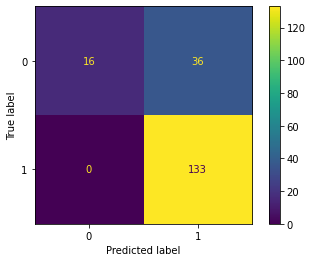



Accuracy:  0.8054054054054054
Recall:  1.0
Precision:  0.7869822485207101
F1:  0.880794701986755
AUC:  0.7164545980335454


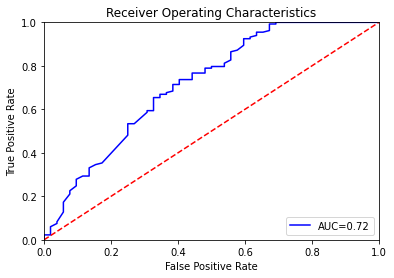

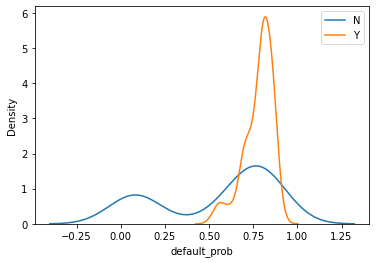

true_class  predicted_class
0           1                  0.692308
            0                  0.307692
1           1                  1.000000
Name: predicted_class, dtype: float64


In [83]:
# Return the results
eval_model(model,X_test,y_test)

In [82]:
#Prediction for a single item
model.predict([[0,1,0,4583,128.0,1.0]])

array([1], dtype=int64)